In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

import pandas as pd
import random, time
from babel.dates import format_date, format_datetime, format_time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweetsdataset/train_neg.txt
/kaggle/input/tweetsdataset/train_pos.txt
/kaggle/input/tweetsdataset/test_data.txt


In [9]:
def import_data(path_dataset_neg, path_dataset_pos):
    """
    This function imports the data set, adds labels and returns a Pandas Dataframe, without duplicates. 
    Input : path of negative data set, path of postive dataset 
    Output: Pandas data frame with two columns : text and label
    """

    #Kaggle version
    train_neg = [tweet[:-1] for tweet in open(path_dataset_neg).readlines()]
    train_pos = [tweet[:-1] for tweet in open(path_dataset_pos).readlines()]
        
    X, y = train_neg + train_pos, [-1 for i in range(len(train_neg))]+[1 for i in range(len(train_pos))]
    df = pd.DataFrame(list(zip(y, X)), columns = ['label','text'], dtype = str)
    df.drop_duplicates(inplace = True)# Delete duplicate Tweets
    df['label'] = df['label'].astype(int)
    
    return df

In [10]:
path_dataset_neg = "/kaggle/input/tweetsdataset/train_neg.txt"
path_dataset_pos = "/kaggle/input/tweetsdataset/train_pos.txt"
df = import_data(path_dataset_neg, path_dataset_pos)
df.describe()

,label
count,181321.000000
mean,-0.004715
std,0.999992
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,1.000000
max,1.000000


<AxesSubplot:>

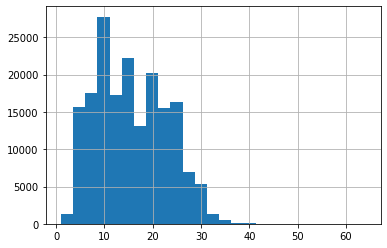

In [11]:
# get length of all the titles in the dataframe
seq_len_premise = [len(i.split()) for i in df['text']]

pd.Series(seq_len_premise).hist(bins = 25)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

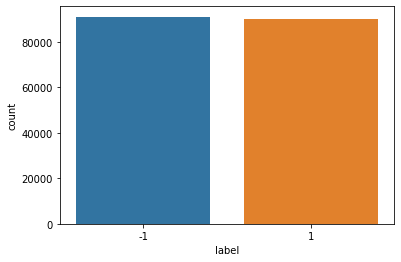

In [12]:
# Plot the count of fake and true news 
sns.countplot(df['label'])

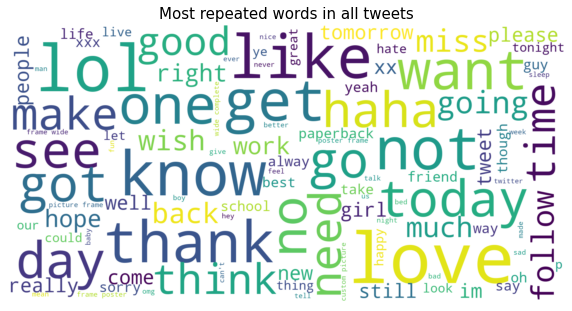

In [13]:
# Wordcloud of text

# Get stopwords
# Define nltk stopwords in english
#stop_words = stopwords.words('english')
stop_words_2 = ['i', 'me', 'my', 'myself', 'we','url' 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain']
stop_words = stop_words_2
stop_words.extend(['u', 'wa', 'ha','ho', 'would', 'com', 'user','', '' 'url', 'rt', 'custom picture', 'i\'m', 'picture frame','', 'positer frame', 'x','i\'ll'])
stop_words.remove('not')
stop_words.remove('no')
stop_words.remove('nor')

# Get a string of all the texts available
data_text = ",".join(txt.lower() for txt in df.text)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      stopwords=stop_words,
                      scale=5,
                      background_color="white").generate(data_text)

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most repeated words in all tweets',fontsize=15)
plt.show()

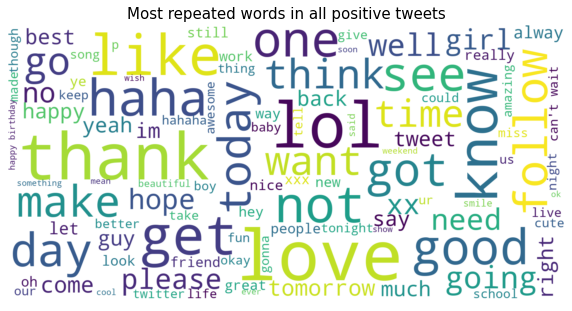

In [15]:
# Get a string of the positive tweets only
data_text_true = ",".join(txt.lower() for txt in df.text[df.label == 1])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      stopwords=stop_words,
                      scale=5,
                      background_color="white").generate(data_text_true)

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most repeated words in all positive tweets',fontsize=15)
plt.show()

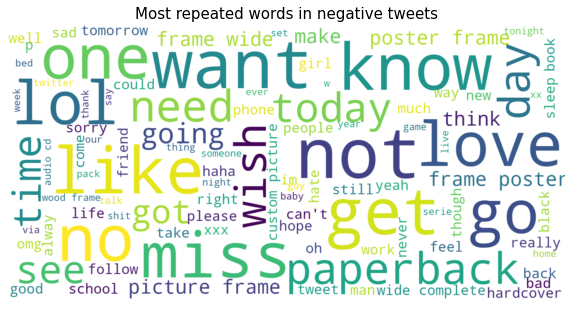

In [16]:
# Get a string of the negative tweets text only
data_text_fake = ",".join(txt.lower() for txt in df.text[df.label==-1])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100,
                      stopwords=stop_words,
                      scale=5,
                      background_color="white").generate(data_text_fake)

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most repeated words in negative tweets',fontsize=15)
plt.show()